# PCA (Principal Component Analysis) - 비지도 학습
- 주성분 정보를 벡터와 길이로 분석
- 활용 분야<br>
① 주성분 분석<br>
 -데이터의 주축(principal axes)의 목록을 구하고, 그 축을 사용해 데이터 세트를 설명<br>
 -특징 추출<br>
 ② 차원 축소<br>
  -데이터의 분산 정보를 가장 많이 포함하는 주축으로 차원 축소 

## (1) 주성분 분석

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

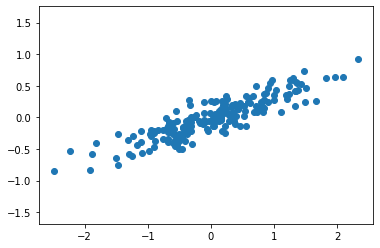

In [5]:
# PCA를 위한 자료 준비
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

① 성분(component) : 벡터의 방향<br>
② 설명 분산(explained variance) : 해당 벡터의 제곱 길이

In [7]:
from sklearn.decomposition import PCA
mypca = PCA(n_components = 2)
mypca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
print(mypca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [9]:
print(mypca.explained_variance_)

[0.7625315 0.0184779]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

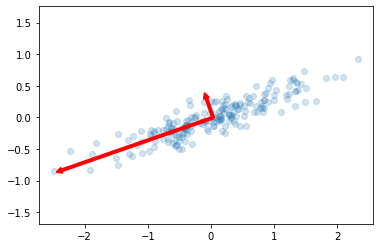

In [11]:
def draw_vector(v0, v1, ax=None):
  ax = ax or plt.gca()
  arrowprops = dict(color='red',
                    arrowstyle='simple',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
  ax.annotate('', v1, v0, arrowprops=arrowprops)

# data plotting
plt.scatter(X[:,0], X[:,1], alpha=0.2)
for length, vector in zip(mypca.explained_variance_, mypca.components_):
  v = vector * 3 * np.sqrt(length)
  draw_vector(mypca.mean_, mypca.mean_ + v)
plt.axis('equal')

In [13]:
print(mypca.components_)
print(mypca.explained_variance_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
[0.7625315 0.0184779]


## (2) 차원 축소에의 응용
- 가장 작은 주성분 중 하나를 삭제해 최대 데이터 분산을 보존하는 더 작은 차원으로 데이터를 사용함

In [15]:
dimpca = PCA(n_components=1)
dimpca.fit(X)
X_pca = dimpca.transform(X)
print('original shape: ', X.shape)
print('transformed shape: ', X_pca.shape)

original shape:  (200, 2)
transformed shape:  (200, 1)


- 자료 출력

(-2.731158226766438,
 2.6099018832593326,
 -0.9672765706389318,
 1.006064230853995)

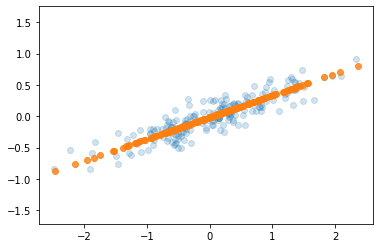

In [17]:
# 역변환
X_new = dimpca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
plt.axis('equal')

## (3) 특징 추출 : 얼굴 특징 추출


In [19]:
# 고유 얼굴 성분 찾기
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [21]:
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


In [23]:
from sklearn.decomposition import PCA
face_pca = PCA(150)
face_pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

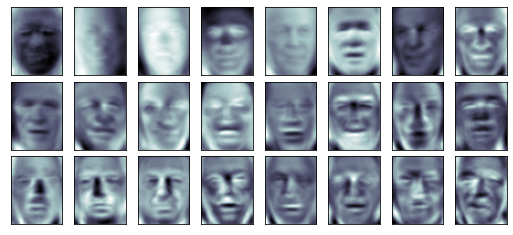

In [24]:
fig, axes = plt.subplots(3,8, figsize=(9,4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(face_pca.components_[i].reshape(62,47), cmap='bone')